# Multi-class Classification - Predict the Poker Hand

Dataset:
https://archive.ics.uci.edu/ml/datasets/Poker+Hand

## Dataset observations

https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand.names

- 10 classes
- 1 million test samples
- missing values: None
- classes are not balanced (some poker hands are rare)
- separate test dataset from train dataset

## Workflow

Data Gathering
1. read_csv for both training and test set

Data Transformation
2. transform dataframe
3. PCA to plot (for classification)
4. shuffle training set (train test split not necessary as there is a separate test set)
5. (scaling is optional because the column values are all similar)

Training
6. Train a Logistic Regression model
7. Train a Logistic Regression model with SGD

Validation
8. metrics
9. learning curve
10. predictions

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve

## Data Gathering

1. read_csv for both training and test set

In [4]:
df = pd.read_csv('D:/tmp/poker-hand/poker-hand-training-true.data',
                 names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS'])

df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [5]:
df.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [6]:
df_test = pd.read_csv('D:/tmp/poker-hand/poker-hand-testing.data',
                      names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS'])

df_test.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [7]:
df_test.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500493,6.997927,2.499894,7.006097,2.500871,6.998873,2.500393,7.002298,2.499451,6.989481,0.616902
std,1.117768,3.743374,1.118568,3.743481,1.118225,3.741890,1.117245,3.741270,1.118948,3.739894,0.773377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


## Data Transformation (Estimated time: 30 min)
2. transform dataframe
3. PCA to plot (for classification)
4. shuffle training set (train test split not necessary as there is a separate test set)
5. (scaling is optional because the column values are all similar)

```
# How to shuffle a pandas DataFrame
df_shuffled = df.sample(frac=1)
```

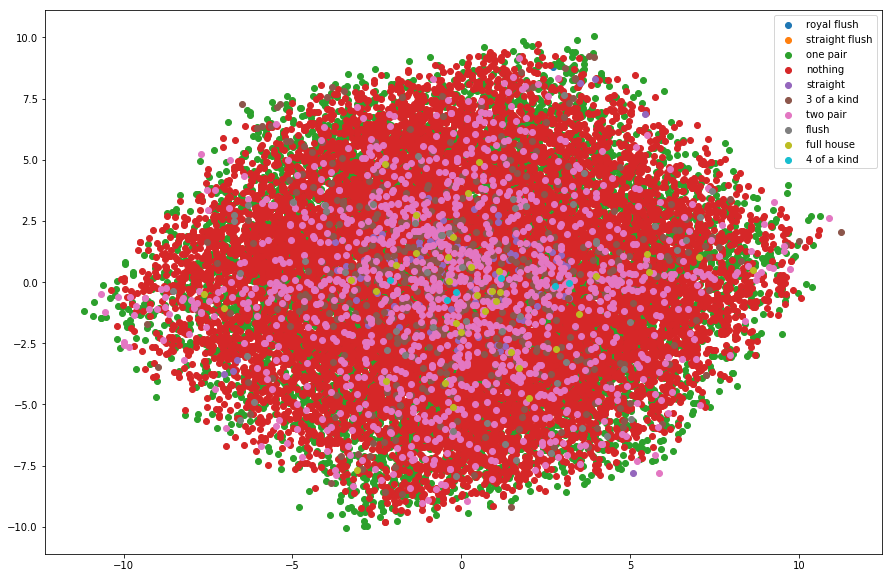

In [10]:
# 0: Nothing in hand; not a recognized poker hand 
# 1: One pair; one pair of equal ranks within five cards
# 2: Two pairs; two pairs of equal ranks within five cards
# 3: Three of a kind; three equal ranks within five cards
# 4: Straight; five cards, sequentially ranked with no gaps
# 5: Flush; five cards with the same suit
# 6: Full house; pair + different rank three of a kind
# 7: Four of a kind; four equal ranks within five cards
# 8: Straight flush; straight + flush
# 9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

labels = np.array([[0, 'nothing'], [1, 'one pair'],
          [2, 'two pair'], [3, '3 of a kind'],
          [4, 'straight'], [5, 'flush'],
          [6, 'full house'], [7, '4 of a kind'],
          [8, 'straight flush'], [9, 'royal flush']])


X_train = df.loc[:, 'S1':'C5']
y_train = df.loc[:, 'CLASS']

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

fig, ax = plt.subplots(figsize=(15, 10))

for value in y_train.unique():
#for value in [9, 8, 1, 0, 4, 3, 2, 5, 6, 7]:
#for value in [9, 8, 4, 3]:
    ax.scatter(X_train_2d[y_train==value][:, 0],
               X_train_2d[y_train==value][:, 1],
               label=labels[value, 1],
               cmap=plt.cm.plasma)
ax.legend()
plt.show()

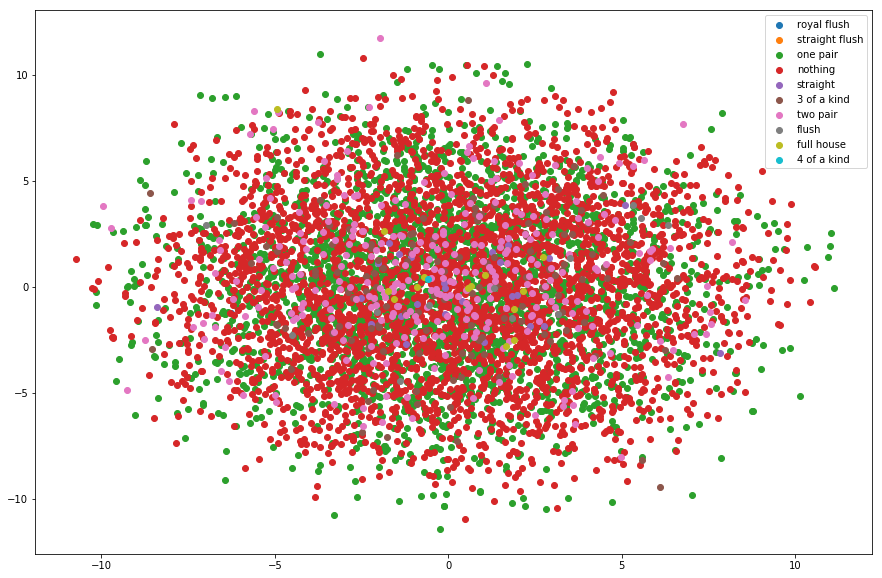

In [11]:
# plot a subset of samples
density = .25
df_subset = df.sample(frac=density, random_state=42)

X_train_subset = df_subset.loc[:, 'S1':'C5']
y_train_subset = df_subset.loc[:, 'CLASS']

pca = PCA(n_components=2)
X_train_subset_2d = pca.fit_transform(X_train_subset)

fig, ax = plt.subplots(figsize=(15, 10))
for value in y_train.unique():    
    ax.scatter(X_train_subset_2d[y_train_subset==value][:, 0],
               X_train_subset_2d[y_train_subset==value][:, 1],
               label=labels[value, 1],
               cmap=plt.cm.plasma)
ax.legend()
plt.show()

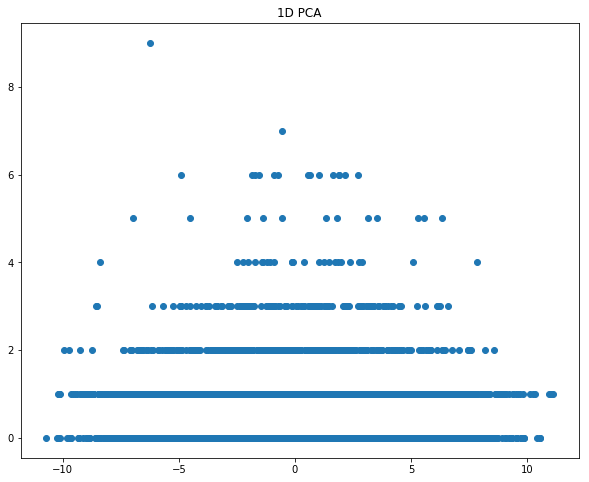

In [12]:
# 1-d PCA
# plot a subset of samples
density = .25
df_subset = df.sample(frac=density, random_state=42)

X_train_subset = df_subset.loc[:, 'S1':'C5']
y_train_subset = df_subset.loc[:, 'CLASS']

pca = PCA(n_components=1)
X_train_subset_1d = pca.fit_transform(X_train_subset)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_train_subset_1d, y_train_subset)
ax.set_title('1D PCA')
plt.show()

In [13]:
# How to shuffle a pandas DataFrame
df_shuffled = df.sample(frac=1)

X_train = df_shuffled.loc[:, 'S1':'C5']
y_train = df_shuffled.loc[:, 'CLASS']

In [14]:
X_test = df_test.loc[:, 'S1':'C5']
y_test = df_test.loc[:, 'CLASS']

## Training
6. logistic regression
7. SGD logistic regression

In [15]:
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train, y_train)

pred_logistic = logistic.predict(X_test)

In [16]:
logistic_bal = LogisticRegression(random_state=42, class_weight='balanced')
logistic_bal.fit(X_train, y_train)

pred_logistic_bal = logistic_bal.predict(X_test)

In [18]:
sgd = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)

pred_sgd = sgd.predict(X_test)

In [19]:
sgd_bal = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3, class_weight='balanced')
sgd_bal.fit(X_train, y_train)

pred_sgd_bal = sgd_bal.predict(X_test)

In [20]:
from sklearn.dummy import DummyClassifier
baseline = DummyClassifier()
baseline.fit(X_train, y_train)

pred_baseline = baseline.predict(X_test)

## Validation
8. metrics
9. learning curve
10. prediction

In [22]:
print('Logistic Regresion:')
print(classification_report(y_test, pred_logistic))
print('Logistic Regresion (balanced):')
print(classification_report(y_test, pred_logistic_bal))

print('SGD:')
print(classification_report(y_test, pred_sgd))
print('SGD (balanced):')
print(classification_report(y_test, pred_sgd_bal))

print('Baseline:')
print(classification_report(y_test, pred_baseline))

Logistic Regresion:
             precision    recall  f1-score   support

          0       0.50      1.00      0.67    501209
          1       0.00      0.00      0.00    422498
          2       0.00      0.00      0.00     47622
          3       0.00      0.00      0.00     21121
          4       0.00      0.00      0.00      3885
          5       0.00      0.00      0.00      1996
          6       0.00      0.00      0.00      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         3

avg / total       0.25      0.50      0.33   1000000

Logistic Regresion (balanced):


C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.51      0.66      0.58    501209
          1       0.39      0.02      0.04    422498
          2       0.00      0.00      0.00     47622
          3       0.00      0.00      0.00     21121
          4       0.01      0.04      0.02      3885
          5       0.06      0.16      0.09      1996
          6       0.00      0.03      0.00      1424
          7       0.00      0.10      0.00       230
          8       0.00      0.00      0.00        12
          9       0.00      0.33      0.00         3

avg / total       0.42      0.34      0.31   1000000

SGD:
             precision    recall  f1-score   support

          0       0.49      0.77      0.60    501209
          1       0.41      0.21      0.28    422498
          2       0.00      0.00      0.00     47622
          3       0.00      0.00      0.00     21121
          4       0.00      0.00      0.00      3885
          5       0.00      0.00     

[[501209      0      0      0      0      0      0      0      0      0]
 [422498      0      0      0      0      0      0      0      0      0]
 [ 47622      0      0      0      0      0      0      0      0      0]
 [ 21121      0      0      0      0      0      0      0      0      0]
 [  3885      0      0      0      0      0      0      0      0      0]
 [  1996      0      0      0      0      0      0      0      0      0]
 [  1424      0      0      0      0      0      0      0      0      0]
 [   230      0      0      0      0      0      0      0      0      0]
 [    12      0      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
[[385855 115354      0      0      0      0      0      0      0      0]
 [334096  88402      0      0      0      0      0      0      0      0]
 [ 38548   9074      0      0      0      0      0      0      0      0]
 [ 17555   3566      0      0      0      0      0

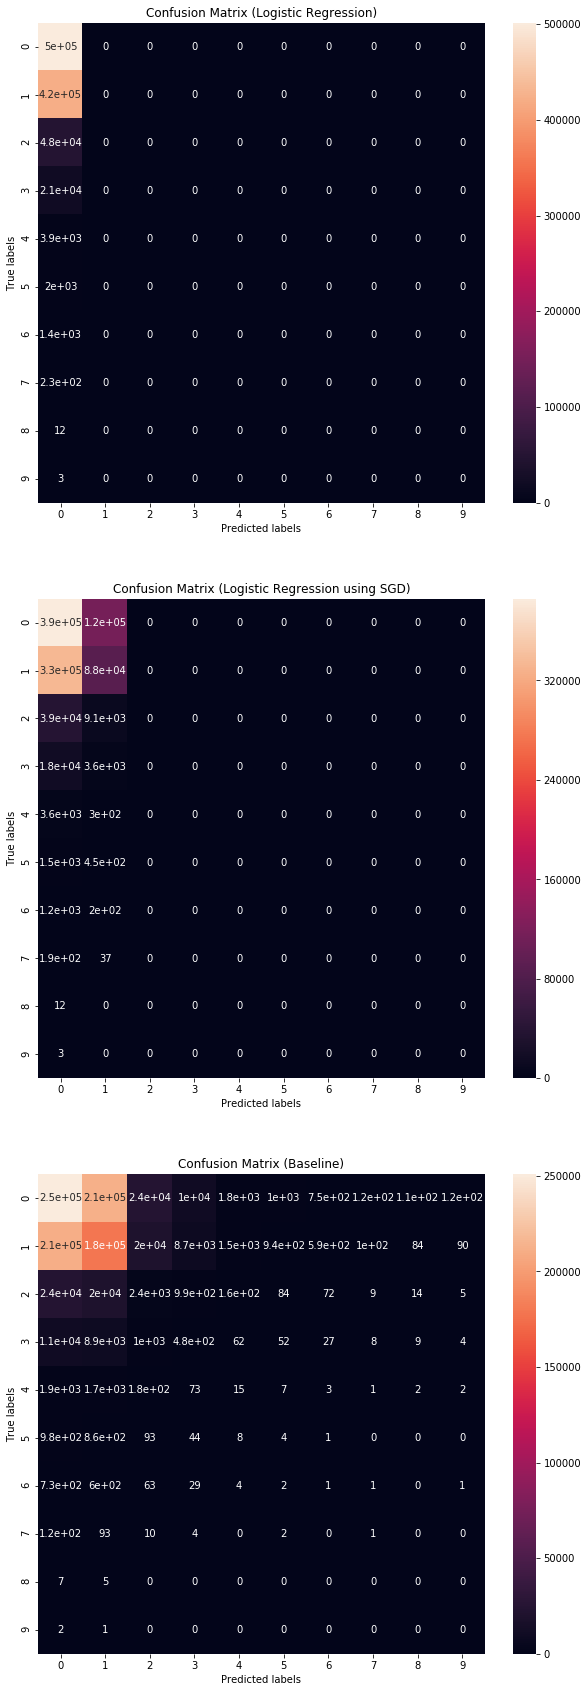

In [23]:
import seaborn as sns

cm_logistic = confusion_matrix(y_test, pred_logistic)
cm_sgd = confusion_matrix(y_test, pred_sgd)
cm_baseline = confusion_matrix(y_test, pred_baseline)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))
ax = axes.flatten()

# annotate cells with ticks
sns.heatmap(cm_logistic, annot=True, ax=ax[0])
sns.heatmap(cm_sgd, annot=True, ax=ax[1])
sns.heatmap(cm_baseline, annot=True, ax=ax[2])

print(cm_logistic)
print(cm_sgd)
print(cm_baseline)

tick_labels = labels[:, 0]

ax[0].set(xlabel='Predicted labels', ylabel='True labels', title='Confusion Matrix (Logistic Regression)') 
ax[0].xaxis.set_ticklabels(tick_labels)
ax[0].yaxis.set_ticklabels(tick_labels)

ax[1].set(xlabel='Predicted labels', ylabel='True labels', title='Confusion Matrix (Logistic Regression using SGD)'); 
ax[1].xaxis.set_ticklabels(tick_labels)
ax[1].yaxis.set_ticklabels(tick_labels)

ax[2].set(xlabel='Predicted labels', ylabel='True labels', title='Confusion Matrix (Baseline)'); 
ax[2].xaxis.set_ticklabels(tick_labels)
ax[2].yaxis.set_ticklabels(tick_labels)

plt.show()

## Alternative Feature Extraction (from Kaggle)

https://www.kaggle.com/c/poker-rule-induction/discussion/11177

```
Extract these features:

- flush (1 or 0 boolean)

- kind1 1 through 5 , number of most frequent card (e.g. 4 means 4 of a kind, 3 could be 3 of a kind or full house, 2 is 2 of a kind or 2 pair, etc.,  1 means, straight or nothing)

- kind2 number of second-most frequent card, so if kind1=3 and kind2=2, full house, kind1=2, kind2=1, then one pair

- high card (1 considered high if it occurs --yeah, concession to poker and other card games)

- low card (needed to distinguish royal flush from ace 2 3 4 5)

- straight (1 or 0 boolean)
```

Reference code:
https://github.com/tdvance/kaggle_submissions/blob/master/poker/dataPrep.py

### Getting the code to run 

In [73]:
def histogram(l):
    h={}
    for x in l:
        if x in h:
            h[x]+=1
        else:
            h[x] = 1
    return h

def hOfH(l, size=None):
    h = histogram(l)
    h = histogram(dict.values(h))
    result = list(dict.values(h))
    result.sort(reverse=True)
    if(size is not None):
        while(len(result)<size):
            result += [0]
        while len(result) > size:
            result.pop()
    return result

def handToFeatures(hand):
    #import pdb; pdb.set_trace()
    suits = [hand[0], hand[2], hand[4], hand[6], hand[8]]
    ranks = [hand[1], hand[3], hand[5], hand[7], hand[9]]
    sh = hOfH(suits, 4)

    flush = int(sh[0] == 1 and sh[1] == 0)

    h = list(dict.values(histogram(ranks)))
    h.sort(reverse=True)
    kind1 = h[0]
    kind2 = h[1]

    ranks.sort()
    if(1 in ranks):
        high = 1
        low = ranks[0]
        if low == 1:
            low = ranks[1]
    else:
        high = ranks[-1]
        low = ranks[0]

    normalized = [(r - low + 13)%13 for r in ranks]
    normalized.sort()
    straight = int(normalized[-1]==4)

    return [flush, kind1, kind2, high, low, straight]

In [74]:
# let's test the code first, before making any changes
df.iloc[0]

S1        1
C1       10
S2        1
C2       11
S3        1
C3       13
S4        1
C4       12
S5        1
C5        1
CLASS     9
Name: 0, dtype: int64

In [75]:
print(df.iloc[0, :10].values)

print(handToFeatures(df.iloc[0, :10].values))

[ 1 10  1 11  1 13  1 12  1  1]
[1, 1, 1, 1, 10, 1]


### Transformation

In [97]:
# select just the features (ignoring the class)
df_original_features = df.iloc[:, :10]

df_original_features.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,10,1,11,1,13,1,12,1,1
1,2,11,2,13,2,10,2,12,2,1
2,3,12,3,11,3,13,3,10,3,1
3,4,10,4,11,4,1,4,13,4,12
4,4,1,4,13,4,12,4,11,4,10


In [98]:
# compose a new dataframe with the new features
# apply the transformation per row
# (confusingly, axis=1 means per row for pandas.DataFrame.apply())

df_new_features = df_original_features.apply(handToFeatures, axis=1)

df_new_features.head()

0    [1, 1, 1, 1, 10, 1]
1    [1, 1, 1, 1, 10, 1]
2    [1, 1, 1, 1, 10, 1]
3    [1, 1, 1, 1, 10, 1]
4    [1, 1, 1, 1, 10, 1]
dtype: object

In [99]:
# problem with the above dataframe is that it's a Series with nested lists
# we need it to be 6 columns

print(type(df_new_features))

print(df_new_features.iloc[0]) # returns a list - we want 6 columns

<class 'pandas.core.series.Series'>
[1, 1, 1, 1, 10, 1]


In [100]:
# convert the list into columns, and add column names too
df_new_features = pd.DataFrame(df_new_features.values.tolist(),
                              columns=['flush', 'most_frequent', '2nd_most_frequent', 'high_card', 'low_card', 'straight'],
                              index=df_new_features.index)

df_new_features.head()

,flush,most_frequent,2nd_most_frequent,high_card,low_card,straight
0,1,1,1,1,10,1
1,1,1,1,1,10,1
2,1,1,1,1,10,1
3,1,1,1,1,10,1
4,1,1,1,1,10,1


In [101]:
# tack on the class so that we can shuffle the X and y values together

df_new_features['CLASS'] = df['CLASS']
df_new_features.head()

,flush,most_frequent,2nd_most_frequent,high_card,low_card,straight,CLASS
0,1,1,1,1,10,1,9
1,1,1,1,1,10,1,9
2,1,1,1,1,10,1,9
3,1,1,1,1,10,1,9
4,1,1,1,1,10,1,9


In [103]:
# Repeat the same procedure for test

# apply() can take a while to run through 1 million rows
%time df_new_features_test = df_test.iloc[:, :10].apply(handToFeatures, axis=1)

df_new_features_test = pd.DataFrame(df_new_features_test.values.tolist(),
                                    columns=['flush', 'most_frequent', '2nd_most_frequent', 'high_card', 'low_card', 'straight'],
                                    index=df_new_features_test.index)

df_new_features_test['CLASS'] = df_test['CLASS']
df_new_features_test.head()

Wall time: 1min 19s


,flush,most_frequent,2nd_most_frequent,high_card,low_card,straight,CLASS
0,0,1,1,1,3,0,0
1,0,2,1,12,2,0,1
2,0,2,1,9,2,0,1
3,0,2,1,1,4,0,1
4,0,1,1,11,2,0,0


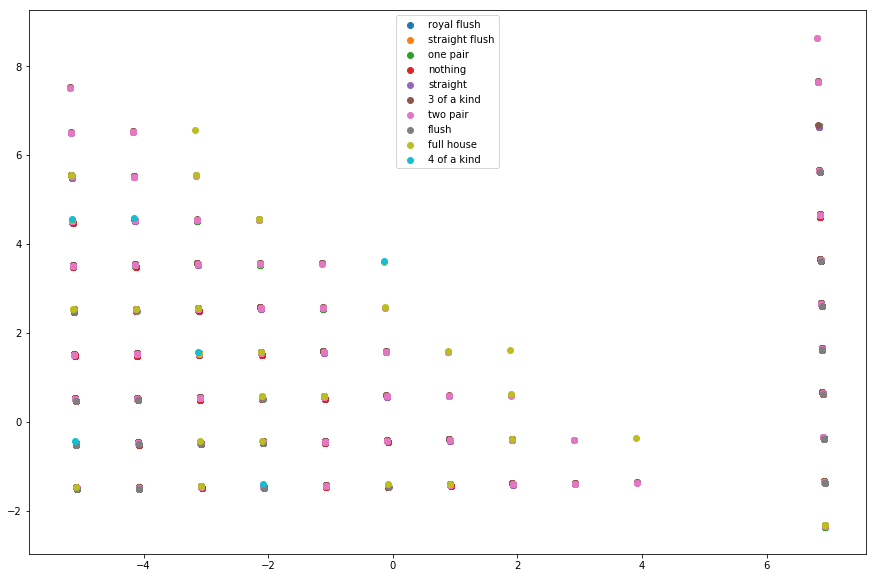

In [105]:
labels = np.array([[0, 'nothing'], [1, 'one pair'],
          [2, 'two pair'], [3, '3 of a kind'],
          [4, 'straight'], [5, 'flush'],
          [6, 'full house'], [7, '4 of a kind'],
          [8, 'straight flush'], [9, 'royal flush']])


X_train = df_new_features.loc[:, 'flush':'straight']
y_train = df_new_features.loc[:, 'CLASS']

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

fig, ax = plt.subplots(figsize=(15, 10))

for value in y_train.unique():
    ax.scatter(X_train_2d[y_train==value][:, 0],
               X_train_2d[y_train==value][:, 1],
               label=labels[value, 1],
               cmap=plt.cm.plasma)
ax.set_title('2D PCA (new features)')
ax.legend()
plt.show()

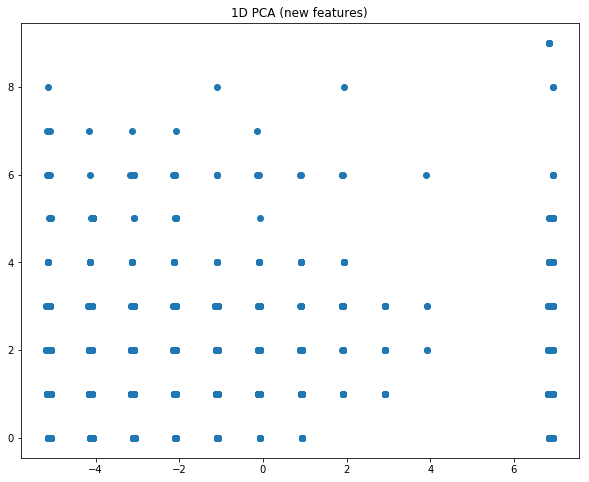

In [107]:
# 1-D PCA
pca = PCA(n_components=1)
X_train_1d = pca.fit_transform(X_train)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_train_1d, y_train)
ax.set_title('1D PCA (new features)')
plt.show()

In [109]:
# Shuffle, train, etc.

df_shuffled = df_new_features.sample(frac=1)
X_train = df_shuffled.loc[:, 'flush':'straight']
y_train = df_shuffled.loc[:, 'CLASS']

X_test = df_new_features_test.loc[:, 'flush':'straight']
y_test = df_new_features_test.loc[:, 'CLASS']

print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

       flush  most_frequent  2nd_most_frequent  high_card  low_card  straight
2601       0              1                  1         13         4         0
20704      0              2                  1         12         3         0
6882       0              1                  1         12         3         0
23843      0              2                  1          1         1         0
19731      0              1                  1          9         2         0
2601     0
20704    1
6882     0
23843    1
19731    0
Name: CLASS, dtype: int64
   flush  most_frequent  2nd_most_frequent  high_card  low_card  straight
0      0              1                  1          1         3         0
1      0              2                  1         12         2         0
2      0              2                  1          9         2         0
3      0              2                  1          1         4         0
4      0              1                  1         11         2         0
0    0


In [112]:
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train, y_train)

pred_logistic = logistic.predict(X_test)
print(classification_report(y_test, pred_logistic))
print(confusion_matrix(y_test, pred_logistic))

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       0.95      1.00      0.98    422498
          2       0.97      1.00      0.99     47622
          3       0.00      0.00      0.00     21121
          4       1.00      0.90      0.95      3885
          5       1.00      1.00      1.00      1996
          6       0.00      0.00      0.00      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       1.00      1.00      1.00         3

avg / total       0.96      0.98      0.97   1000000

[[501209      0      0      0      0      0      0      0      0      0]
 [     0 422498      0      0      0      0      0      0      0      0]
 [     0      0  47622      0      0      0      0      0      0      0]
 [     0  21121      0      0      0      0      0      0      0      0]
 [   379      0      0      0   3506      0      0      0      0     